Missing values:
Customer_care_calls          0
Customer_rating              0
Cost_of_the_Product          0
Prior_purchases              0
Discount_offered             0
Weight_in_gms                0
Reached.on.Time_Y.N          0
Warehouse_block_B            0
Warehouse_block_C            0
Warehouse_block_D            0
Warehouse_block_F            0
Mode_of_Shipment_Road        0
Mode_of_Shipment_Ship        0
Product_importance_low       0
Product_importance_medium    0
Gender_M                     0
dtype: int64
Skewness Before Outlier Removal:
Customer_care_calls    0.391926
Customer_rating        0.004360
Cost_of_the_Product   -0.157117
Prior_purchases        1.681897
Discount_offered       1.798929
Weight_in_gms         -0.249747
dtype: float64
Kurtosis Before Outlier Removal:
Customer_care_calls   -0.308995
Customer_rating       -1.295654
Cost_of_the_Product   -0.972160
Prior_purchases        4.006342
Discount_offered       2.000586
Weight_in_gms         -1.447671
dtype: flo

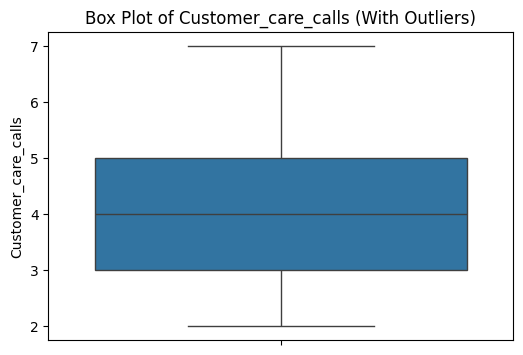

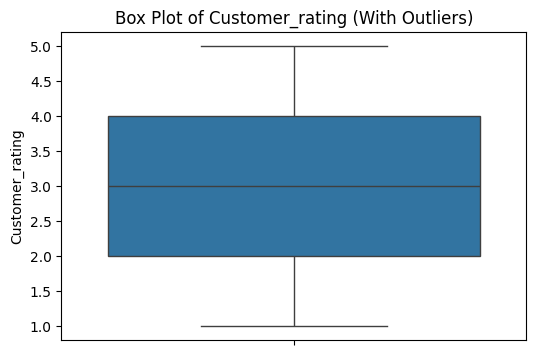

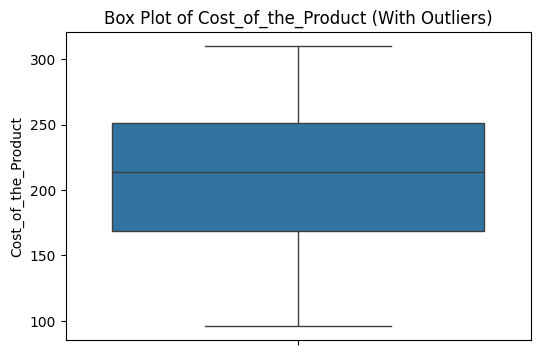

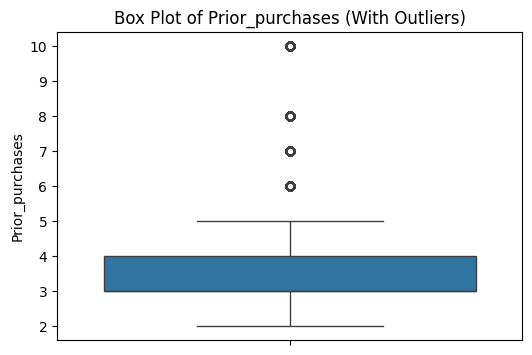

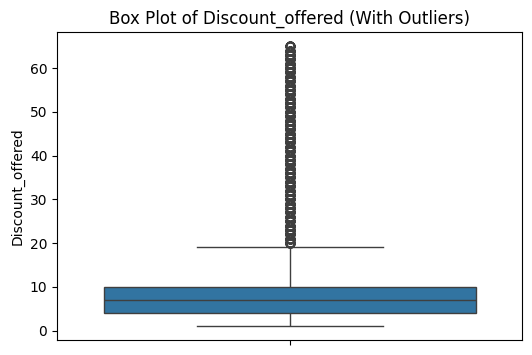

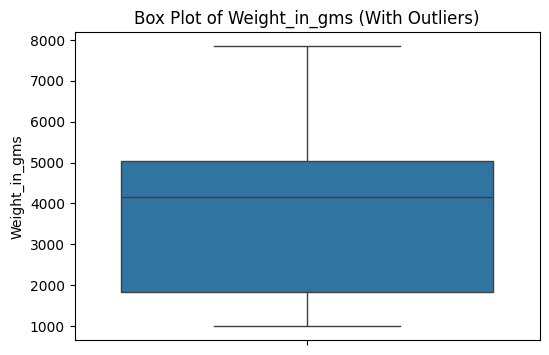

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

file_path = "/content/Train.csv"
df = pd.read_csv(file_path)

df.drop(columns=['ID'], inplace=True)

categorical_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('Reached.on.Time_Y.N')

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("Missing values:")
print(df.isnull().sum())

print("Skewness Before Outlier Removal:")
print(df[numerical_cols].skew())
print("Kurtosis Before Outlier Removal:")
print(df[numerical_cols].kurtosis())

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col} (With Outliers)")
    plt.show()



Skewness After Outlier Removal:
Customer_care_calls    0.383432
Customer_rating       -0.001752
Cost_of_the_Product   -0.205913
Prior_purchases        0.311523
Discount_offered       0.793457
Weight_in_gms         -0.635220
dtype: float64
Kurtosis After Outlier Removal:
Customer_care_calls   -0.388597
Customer_rating       -1.293071
Cost_of_the_Product   -0.935697
Prior_purchases       -0.933627
Discount_offered       1.037978
Weight_in_gms         -1.128888
dtype: float64


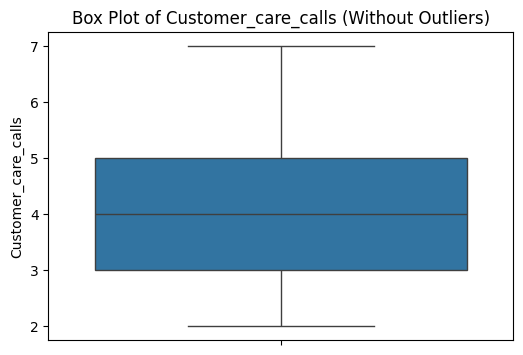

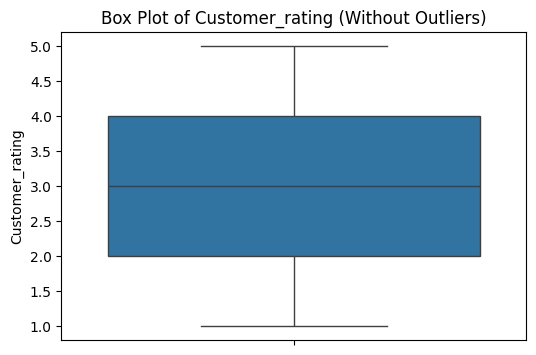

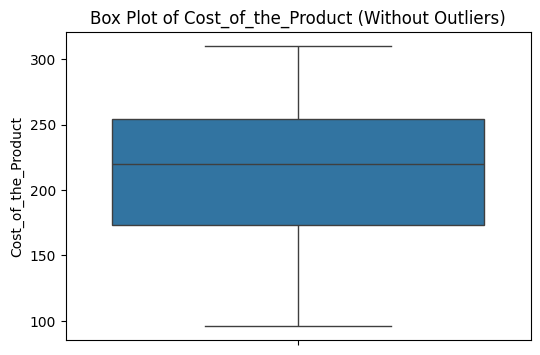

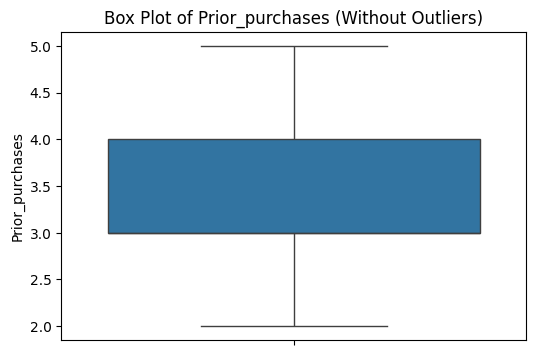

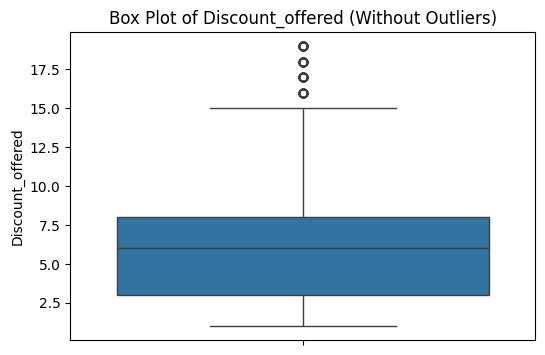

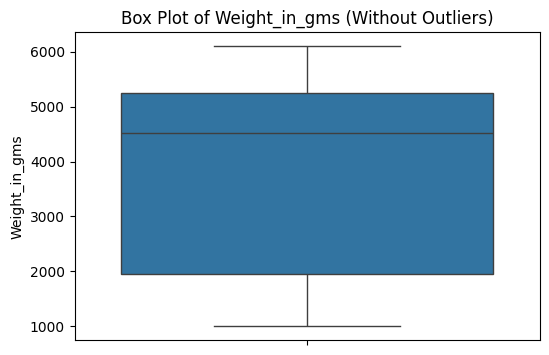

In [ ]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Skewness After Outlier Removal:")
print(df[numerical_cols].skew())
print("Kurtosis After Outlier Removal:")
print(df[numerical_cols].kurtosis())

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col} (Without Outliers)")
    plt.show()


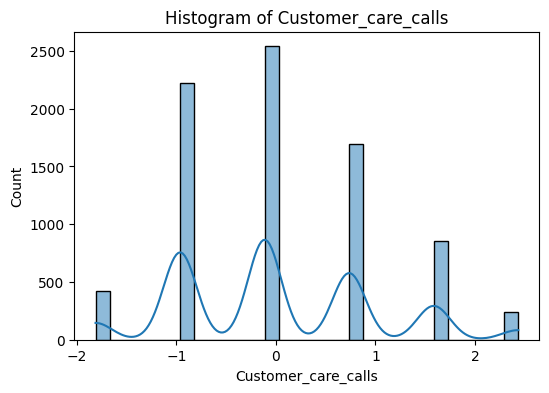

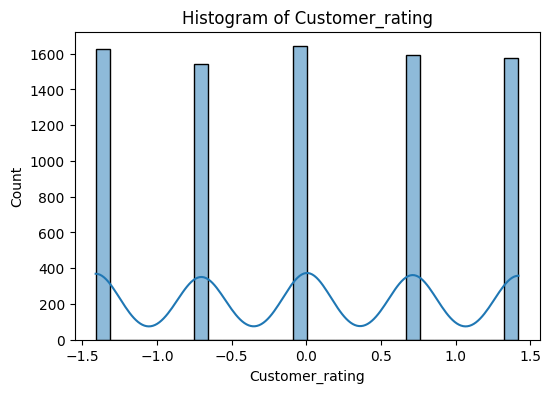

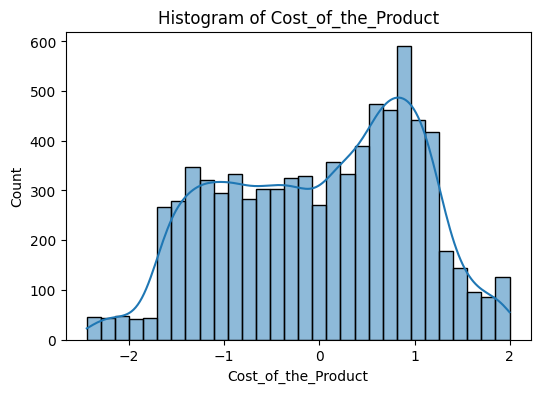

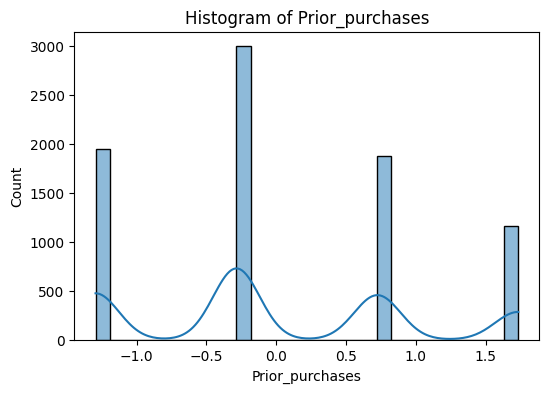

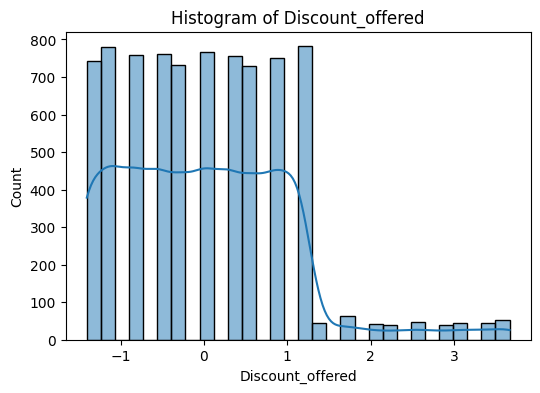

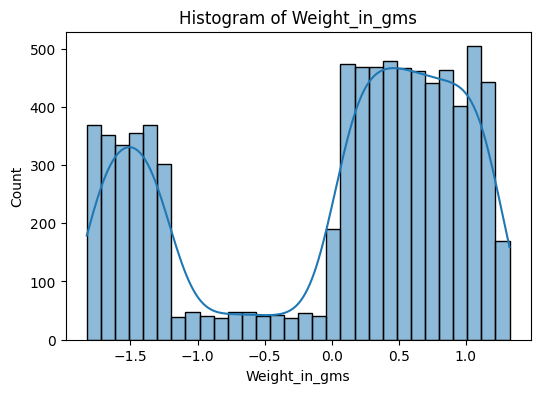

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

In [ ]:

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df.drop(columns=['Reached.on.Time_Y.N'])
y = df['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "LightGBM": LGBMClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Gradient Boosting Performance:
Accuracy: 0.6025078369905956
              precision    recall  f1-score   support

           0       0.56      0.88      0.69       795
           1       0.74      0.32      0.45       800

    accuracy                           0.60      1595
   macro avg       0.65      0.60      0.57      1595
weighted avg       0.65      0.60      0.57      1595

--------------------------------------------------
Random Forest Performance:
Accuracy: 0.5780564263322884
              precision    recall  f1-score   support

           0       0.56      0.69      0.62       795
           1       0.60      0.47      0.53       800

    accuracy                           0.58      1595
   macro avg       0.58      0.58      0.57      1595
weighted avg       0.58      0.58      0.57      1595

--------------------------------------------------
[LightGBM] [Info] Number of positive: 3147, number of negative: 3229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, t